========== MODEL EVALUATION ==========
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

Confusion Matrix:
 [[15  0]
 [ 0 34]]



========== BIAS-VARIANCE ANALYSIS ==========


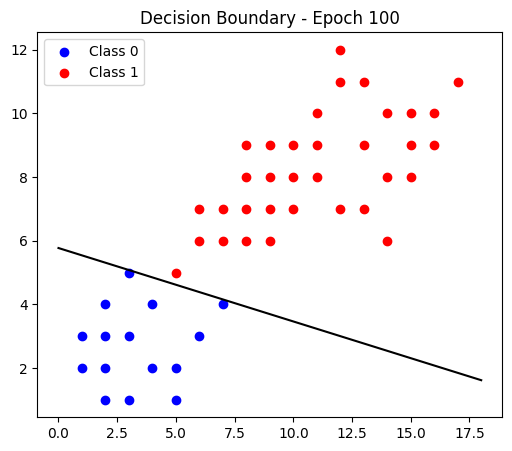

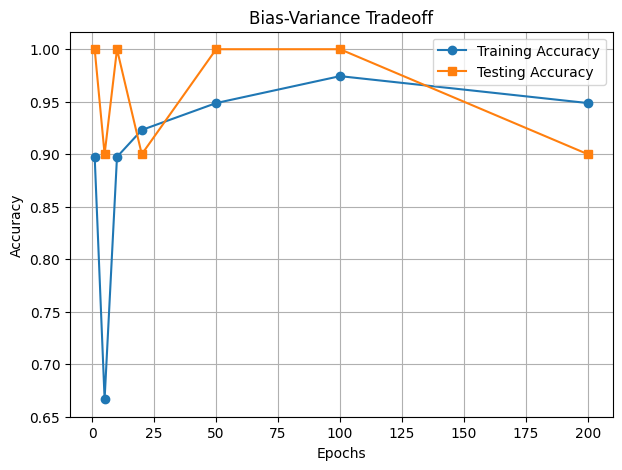

In [1]:
# ============================================
# Perceptron Binary Classification Full Script
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import HTML, display

# ------------------------------
# Dataset
# ------------------------------
data = np.array([
[1,2,0],[2,3,0],[3,1,0],[2,1,0],[4,2,0],
[3,3,0],[5,2,0],[4,4,0],[6,3,0],[5,1,0],
[7,4,0],[3,5,0],[2,4,0],[1,3,0],[2,2,0],
[6,7,1],[7,6,1],[8,7,1],[9,8,1],[10,9,1],
[8,6,1],[7,7,1],[9,6,1],[10,7,1],[8,8,1],
[9,9,1],[11,10,1],[12,11,1],[10,8,1],[11,9,1],
[9,7,1],[6,6,1],[5,5,1],[8,9,1],[12,12,1],
[13,11,1],[14,10,1],[11,8,1],[13,9,1],[15,10,1],
[12,7,1],[14,8,1],[15,9,1],[16,10,1],[13,7,1],
[14,6,1],[15,8,1],[16,9,1],[17,11,1]
])

X = data[:, :2]
y = data[:, 2]

# ------------------------------
# Perceptron Class
# ------------------------------
class Perceptron:

    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.history = []

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
            self.history.append((self.weights.copy(), self.bias))

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# ------------------------------
# Train Model
# ------------------------------
model = Perceptron(learning_rate=0.1, epochs=100)
model.fit(X, y)

# ------------------------------
# Evaluation
# ------------------------------
y_pred = model.predict(X)

print("========== MODEL EVALUATION ==========")
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# ------------------------------
# Decision Boundary Animation
# ------------------------------
fig, ax = plt.subplots(figsize=(6,5))

def update(epoch):
    ax.clear()

    # plot points
    for label, color in zip([0,1], ['blue','red']):
        ax.scatter(X[y==label][:,0], X[y==label][:,1], color=color, label=f"Class {label}")

    weights, bias = model.history[epoch]

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    xx = np.linspace(x_min, x_max, 200)

    if weights[1] != 0:
        yy = -(weights[0]*xx + bias)/weights[1]
        ax.plot(xx, yy, color='black')

    ax.set_title(f"Decision Boundary - Epoch {epoch+1}")
    ax.legend()

ani = FuncAnimation(fig, update, frames=len(model.history), interval=200)

try:
    display(HTML(ani.to_jshtml()))
except:
    plt.show()

# ------------------------------
# Bias Variance Tradeoff
# ------------------------------
print("\n========== BIAS-VARIANCE ANALYSIS ==========")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

epoch_list = [1,5,10,20,50,100,200]
train_acc = []
test_acc = []

for ep in epoch_list:
    temp_model = Perceptron(learning_rate=0.1, epochs=ep)
    temp_model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, temp_model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, temp_model.predict(X_test)))

plt.figure(figsize=(7,5))
plt.plot(epoch_list, train_acc, marker='o', label="Training Accuracy")
plt.plot(epoch_list, test_acc, marker='s', label="Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid()
plt.show()
